# SQL 4 Data Science: Predict Project
## Bhejane Online Trading Store

### Student Starter Notebook

© Explore Data Science Academy

### Honour Code

I {**YOUR NAME**, **YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id='Context'></a>
### 1. Context

The Bhejane trading store is an online retailer specialising in Covid essential items. The store has recently been struggling with the management of its database-related inventory system. Luckily for them, you've been hired as a consultant to fix the problem. 

Its time to flex your Ninja SQL skills! 
 
**Your mission, should you choose to accept it:**

You will receive a denormalised database consisting of two tables. Your task is to transform the database such that is in third normal form (3NF). To ensure that a consistent normalisation process is followed by each student, we have attached an Entity Relationship Diagram (ERD) which is a guideline on what tables need to be produced. Once you have normalised the database, you will be required to complete an MCQ test found under the 'Predict' tab of Athena.  

Though the normalisation process, you will be guided into acknowledging client (Bhenjane Trading) use-cases for the database, and dealing with data anomalies in SQL. 

![Bhejane company logo](https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/Bhejane.png)
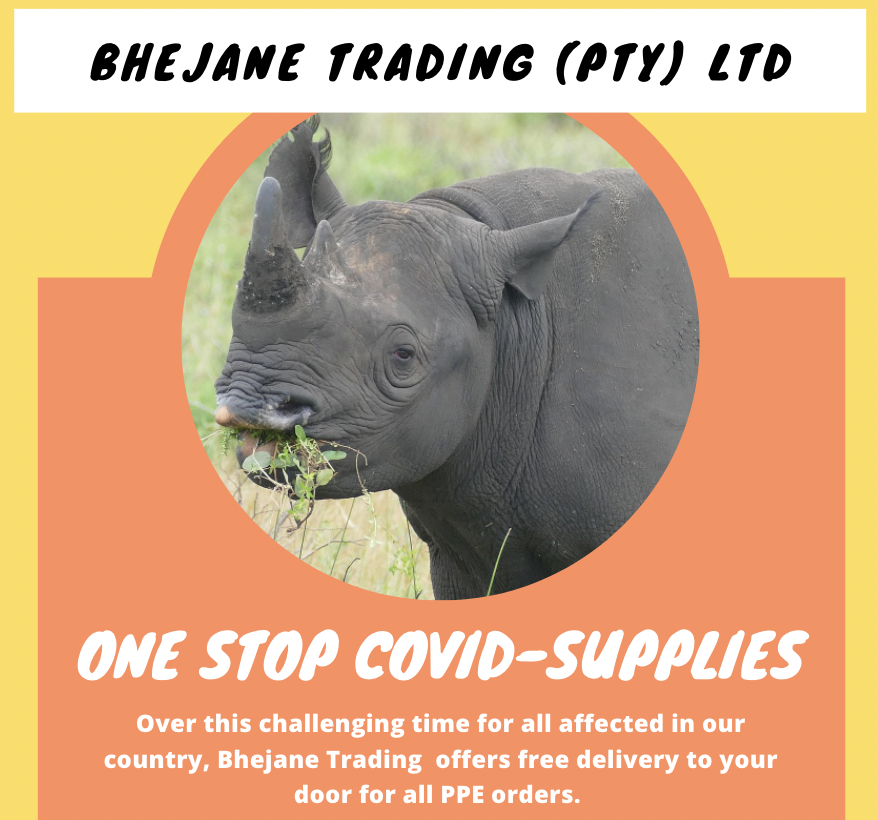

<div align="center" >
    Bhejane, or the Black Rhino. Image by <a href="https://commons.wikimedia.org/wiki/File:Black_Rhino_(Diceros_bicornis)_browsing_..._(46584052962).jpg">Wikimedia Commons</a>
</div>

<a id='Imports'></a>
### 2. Imports
Please use the below command to install sql_magic, this is the package that will assist you with SQL syntax hightlighting.
* pip install sql_magic

Remember to start each new cell with " %%read_sql "

In [1]:
# DO NOT EDIT THIS CELL
import sqlite3
import csv
from sqlalchemy import create_engine
%load_ext sql_magic

# Load SQLite database
engine  = create_engine("sqlite:///bhejane.db")
%config SQL.conn_name ='engine'

<a id='Data_description'></a>
### 3. Data description

The original database consist of 2 tables. 
* Product Table
* Transaction Table

The `Product` table consists of the stock of all inventory that Bhejane has on hand currently, or has had on hand historically. Items which are in this table are able to be purchased, and a record of all sales (transactions) in 2020 is notorised in the `Transactions` table. To link the tables - the `barcode` can be used. Any item in the `Transactions` table, must therefore appear in the `Products` table. 

In [2]:
# DO NOT EDIT THIS CELL
import pandas as pd
data_description = pd.read_excel('Data Description.xlsx')
data_description

,Table Name,Column Name,Desciption
0,Products,Width,Width of the product once assembled
1,Products,Length,Length of the product once assembled
2,Products,Height,Height of the product once assembled
3,Products,Barcode,The unique product identifier
4,Products,Quantity,Number of goods in stock
5,Products,Brand,Product brand name relating to product company
6,Products,NavigationPath,Navigation path to specific product
7,Products,Colour,Name default colour for the product
8,Products,StockCountry,Country where the stock was bought from
9,Products,ProductDescription,Descriptive product name


<a id='Setting_up'></a>
### 4. Setting up the database

In [3]:
#DO NOT EDIT THIS CELL
conn = sqlite3.connect('bhejane.db')
cursor = conn.cursor()

#### Creating both Products and Transaction Tables

In [4]:
%%read_sql
--DO NOT EDIT THIS CELL
DROP TABLE IF EXISTS "Products";
DROP TABLE IF EXISTS "Transactions";

CREATE TABLE "Products" (
    "Width"   REAL,
    "Length"  REAL,
    "Height"  REAL,
    "Barcode" VARCHAR(150),
    "Quantity" REAL,
    "Brand" VARCHAR(150), 
    "NavigationPath" VARCHAR(150),
    "Colour" VARCHAR(150),
    "StockCountry" VARCHAR(150),
    "ProductDescription" VARCHAR(150),
    "PackType" VARCHAR(150), 
    "Volume_litre" REAL, 
    "Warranty" VARCHAR(150), 
    "Weight_kg" REAL,
    "ItemDescription" VARCHAR(150), 
    "Price" REAL
);


CREATE TABLE "Transactions" (
    "CartID" INTEGER,
    "Barcode" VARCHAR(150), 
    "Total" REAL,
    "UserName" VARCHAR(150), 
    "InvoiceDate" DATETIME
);

Query started at 10:32:07 AM South Africa Standard Time; Query executed in 0.00 m

#### Load Data into Product and Transaction tables

Although we have not yet covered python in the sprint at EXPLORE - you have additional resources at your disposal, one of which happens to be a data engineering expert, and she has created a brief script for you which can be used to extract the data from the csv files, and load it into a sqlite database. 

This will be included in your submission, so that the end-to-end processing of the data is visible, and repeatable for any additional consultants who may be brought on board at a later stage. 


In [5]:
# DO NOT EDIT CELL
#Load data into Product table
with open('bhejane_covid_essentials_Products.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['Width'],i['Length'],i['Height'], i['Barcode'], i['Quantity'], i['Brand'], i['NavigationPath'], i['Colour'], i['StockCountry'], i['ProductDescription'],i['PackType'],i['Volume_litre'],i['Warranty'],i['Weight_kg'],i["ItemDescription"],i['Price']) for i in dr]

cursor.executemany("INSERT INTO Products VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
conn.commit()

with open('bhejane_covid_essentials_Transactions.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['CartID'],i['Barcode'], i['Total'], i['UserName'], i['InvoiceDate']) for i in dr]

cursor.executemany("INSERT INTO Transactions VALUES (?, ?, ?, ?, ?);", to_db)
conn.commit()

<a id='ERD'></a>
### 5. Denormalized Database Tables

<br>

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/Denormalized_Tables.png" alt="Denormalized Tables" border="0">

#### 5.1 Explore the Denormalized Tables
Familiarize yourself with the data given in the two tables by writing your own SQL queries to explore properties of the dataset.i.e Look for data inconsistencies, anormalies, redundancies etc to guide your normalization process. 

This section will not be graded - think of it as your own scratch pad.



In [6]:
%%read_sql
-- #Use this section to explore the database by writing your own queries
SELECT * FROM Products
LIMIT 2;

Query started at 10:32:08 AM South Africa Standard Time; Query executed in 0.00 m

,Width,Length,Height,Barcode,Quantity,Brand,NavigationPath,Colour,StockCountry,ProductDescription,PackType,Volume_litre,Warranty,Weight_kg,ItemDescription,Price
0,,,,300507946,493.0,Hikvision,Computers & Tablets / Smart Home & Connected L...,,,Hikvision 1080P 2MP Turbo HD IR Bullet Camera,,0.0,Limited (6 months),,1 x Hikvision 1080P Bullet camera,399.0
1,,,,300507946,493.0,Hikvision,Computers & Tablets / Smart Home & Connected L...,,,Hikvision 1080P 2MP Turbo HD IR Bullet Camera,,0.0,Limited (6 months),,Manual,399.0


### 6. Normalize the given Database tables to the 1st Normal Form (1NF)

Given the below below target ERD create new tables such the the database conforms to the 1st Normal Form

![1st Normal Form](https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/1stNF.png)


It is suggested that you create all your tables before attempting to populate them with data, this will help reduce errors that might creep up due to logical dependencies.
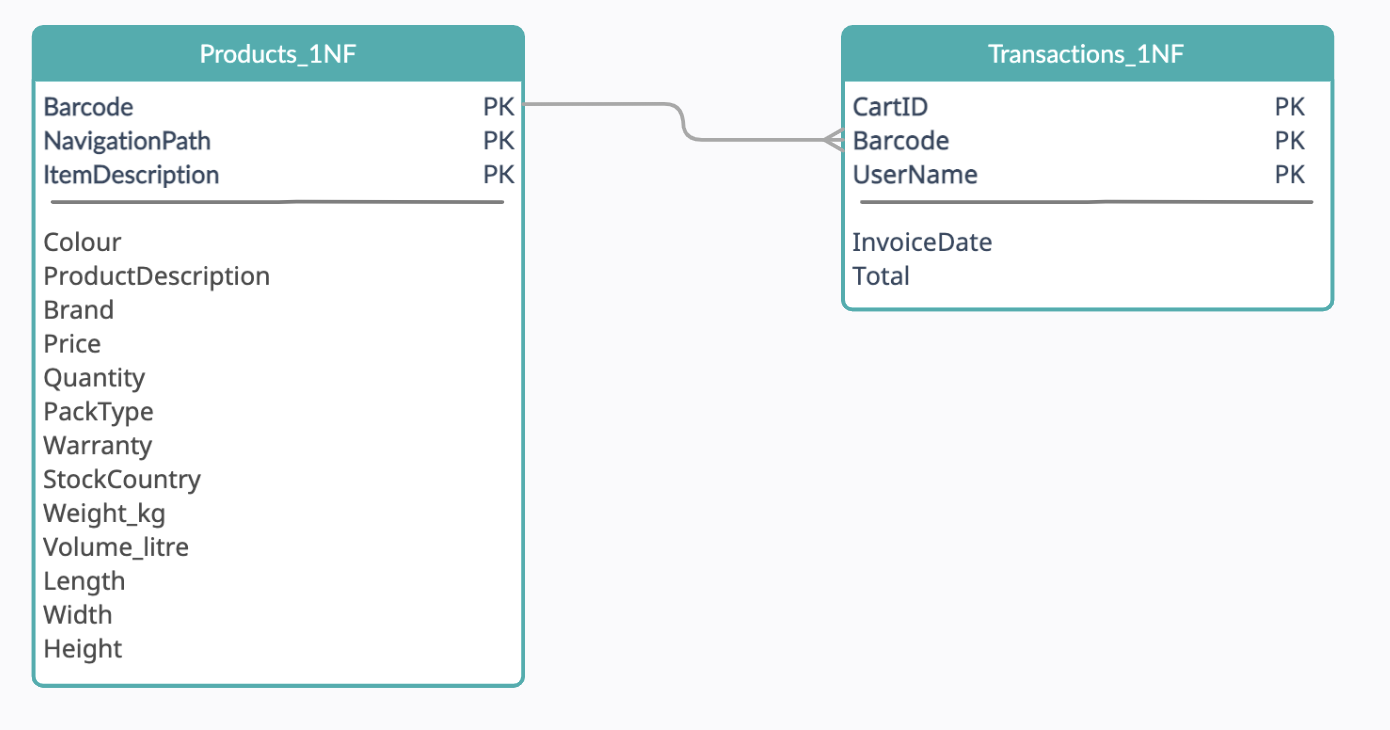

#### 6.1 Create the tables required for the 1st Normal Form
Use the above ERD sketch to create the required tables. Please label your tables as they appear in the ERD sketch

In [7]:
%%read_sql
--#Create tables required for 1NF
DROP TABLE IF EXISTS "Products_1NF";
DROP TABLE IF EXISTS "Transactions_1NF";

CREATE TABLE "Products_1NF"(
    "Barcode" VARCHAR(150),
    "NavigationPath" VARCHAR(150),
    "ItemDescription" VARCHAR(150),
    "Colour" VARCHAR(150),
    "ProductDescription" VARCHAR(150) NOT NULL,
    "Brand" VARCHAR(150),
    "Price" REAL NOT NULL,
    "Quantity" INTEGER NOT NULL,
    "PackType" VARCHAR(150),
    "Warranty" VARCHAR(150),
    "StockCountry" VARCHAR(150),
    "Weight_kg" REAL,
    "Volume_litre" REAL,
    "Length" REAL,
    "Width" REAL,
    "Height" REAL,
    PRIMARY KEY("Barcode","NavigationPath","ItemDescription")
);

CREATE TABLE "Transactions_1NF" (
    "CartID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "UserName" VARCHAR(150) NOT NULL,
    "InvoiceDate" DATETIME NOT NULL,
    "Total" REAL NOT NULL,
    FOREIGN KEY ("Barcode") REFERENCES "Products_1NF" ("Barcode"),
    PRIMARY KEY("CartID", "Barcode", "UserName")
);

Query started at 10:32:08 AM South Africa Standard Time; Query executed in 0.00 m

#### 6.2 Populate the tables you have create in the above section.

Populate the tables such that the database conforms to the 1st Normal Form

In [8]:
%%read_sql
--#Populate the 1NF tables
DELETE FROM "Products_1NF";
DELETE FROM "Transactions_1NF";

INSERT INTO "Products_1NF" ("Barcode","NavigationPath","ItemDescription","Colour","ProductDescription","Brand",
                            "Price","Quantity","PackType","Warranty","StockCountry","Weight_kg",
                            "Volume_litre","Length","Width","Height")
SELECT DISTINCT
     Barcode
    ,NavigationPath
    ,ItemDescription
    ,Colour
    ,ProductDescription
    ,Brand
    ,Price
    ,Quantity
    ,PackType
    ,Warranty
    ,StockCountry
    ,Weight_kg
    ,Volume_litre
    ,Length
    ,Width
    ,Height 
FROM 
    Products;

INSERT INTO "Transactions_1NF"("CartID","Barcode","UserName","InvoiceDate","Total")
SELECT DISTINCT 
    CartID
    ,Barcode
    ,UserName
    ,InvoiceDate
    ,Total
FROM
    Transactions;
    

Query started at 10:32:08 AM South Africa Standard Time; Query executed in 0.00 m

###  7. Convert the database into its 2nd Normal Form (2NF).

Please label your tables as they appear in the ERD sketch.

#### 7.1 Entity Relationship Diagram

![2nd Normal Form](https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/2ndNF.png)

#### 7.2 2NF Requirements
To transition from 1NF to 2NF, we need all columns in all tables to not have a partial dependancy on the PK of the table. This means that any tables which have a composite key e.g. `PRIMARY KEY("Barcode","NavigationPath","ItemDescription")` cannot have columns in the table which are dependant on only `Barcode`, `NavigationPath`, or `ItemDescription`. 

In moving to 2NF we will seperate out each of these as a primary key (for their own respective tables), and any columns dependant on one of these columns but not the others, will go into that table. The only columns remaining in the tables will be fully functionally dependant on the primary key of the table. For example, 

Thereby, we remove the partial dependancy, and will be in 2NF. We are instructed to create a unique identifier for the `Transactions_2NF`. 

**Second normal form notes**

<br>$\bullet$ Notice that `Total` is only dependant on `CartID` and not on `<CartID,barcode>`. This is a partial dependancy
<br>$\bullet$ Second normal form required no *partial functional dependancy* on the key. 
<br>$\bullet$ This can be achieved in 2 ways: create a unique identifier per row (so that there is a simple primary key), or break the table up into only the columns which are fully dependant on the composite key. 
<br>$\bullet$ We are going to opt for the easier solution, and create a unique simple primary key on the `Transactions_1NF`. We can create a unique primary key by concatenating `CartID||barcode`
<br>$\bullet$ NB - this approach does make it more challenging to get into 3NF! Which would be a good argument to opt for the latter approach. 
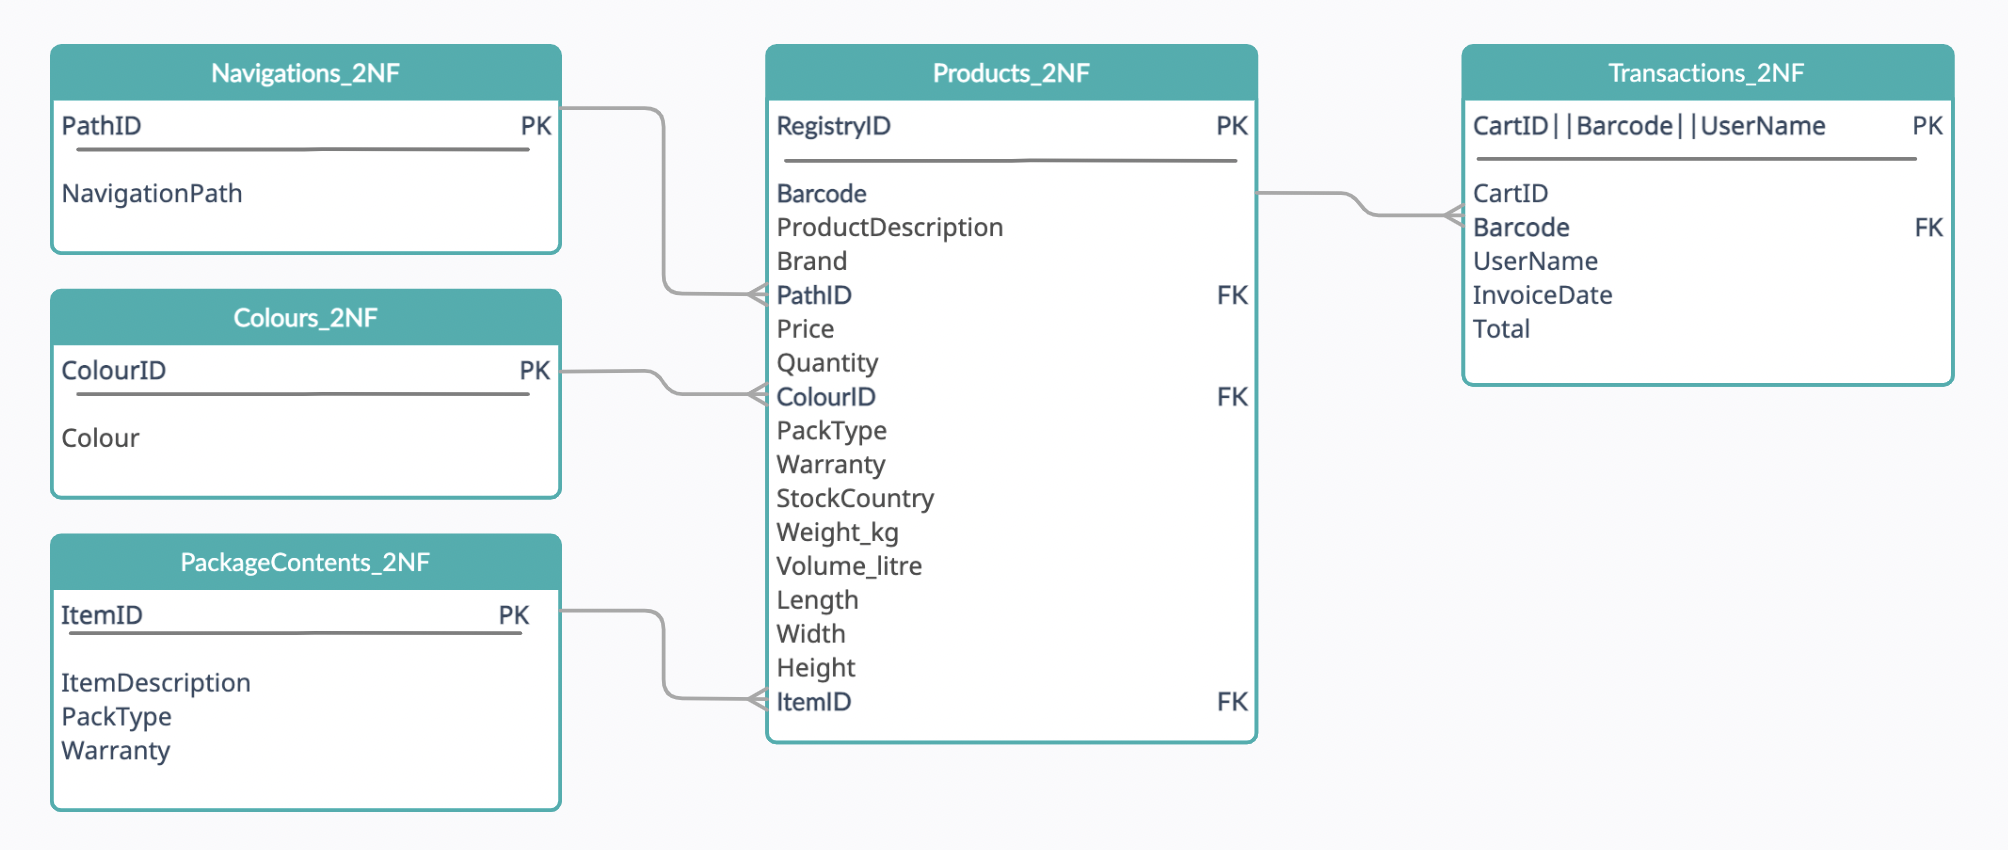

#### 7.3 Data Anomalies

You may stumble into an error when you insert the data which violates this constraint. You query this with the data owner, and you are told that there are three transactions in the database which were errors. You are informed that *all transactions in the database correspond to products are in the database*.

These entries were captured incorrectly, and must be removed. How will you deal with this? 

In [9]:
%%read_sql
select count(distinct barcode) from Transactions_1NF where barcode not in (select barcode from products_1NF)

Query started at 10:32:09 AM South Africa Standard Time; Query executed in 0.00 m

,count(distinct barcode)
0,2


### <font color='turquoise'>Action: remove the affected entries with a `delete` query </font>

In [11]:
%%read_sql
delete from ...

In [ ]:
%%read_sql
-- Should show no entries!
select count(distinct barcode) from Transactions_1NF where barcode not in (select barcode from products_1NF)

#### 7.4 FK Requirements

_Note: sqlite does not always enforce foreign key constraints (and it is even more inconsistent with magic commands to enforce FK constraints!), so it is critical that you understand the purpose of the foreign key constraint and therefore are able to enforce the FK constraint yourself!_

To enforce data integrity, and to ensure that strange things cannot happen - we will have a FK constraint. A foreign key forces all values of the FK, to be limited to only the values which exist as entries in the PK column of the table for which the aforementioned table is a foreign key to. For example, we cannot sell a product (in our Transactions table) which we do not have in our Products table. 

You will need to work around this by removing the erroneous data from the tables before continuing, since this would violate the FK constraint between the Transactions_2NF and Products_2NF table otherwise. 

_Hint: Identify the observations in the Transactions_1NF table, and remove them from there._

#### 7.5 Client Use-Case Requirements

The data owner has advised that there were several instances of incorrect data capturing. Whenever data was partially captured, it was redone, but the partially-complete entries have not been removed from the database. 

For all tables which are going to be used, consider the table utility relative to the Products (Products_2NF) table. You are tasked with removing 'useless' entries as you take the data from 1NF to 2NF. For the sake of ease-of-use for the client, we will removing all rows in the 2NF tables `PackageContents_2NF` and `Colours_2NF` which have an empty value for the attributes that the client will use them for - these are the `ItemDescription` and `Colour` columns, respectively. 

_Hint: Make inserts into the other 2NF (`PackageContents_2NF` and `Colours_2NF`) tables using a `where` clause to remove instances of the value being an empty string, or a `null` value. This will need to be considered for the `ItemDescription` and for the `Colour` when data is inserted into the corresponding tables above (i.e. only insert data into the `PackageContents_2NF` which has a value for the `ItemDescription`, and only insert data into the `Colours_2NF` table which has a value for `Colour`_

### <font color='turquoise'>Action: Investigate these anomalies for the tables mentioned </font>

In [ ]:
%%read_sql 

SELECT DISTINCT 
    ItemDescription,
    PackType,
    Warranty 
FROM
    Products
WHERE ItemDescription = '';

Query started at 02:09:34 AM SAST; Query executed in 0.00 m

,ItemDescription,PackType,Warranty
0,,,Limited (6 months)
1,,,Non-Returnable
2,,,Limited (12 months)
3,,,Limited (120 months)
4,,,Limited (180 months)
5,,,Limited (18 months)
6,,,Supplier (12 months)
7,,Single,Limited (6 months)
8,,,Limited (24 months)
9,,,


### Let's do it! Construct the database above in second normal form

In [ ]:
%%read_sql
--#Create tables required for 2NF

DROP TABLE IF EXISTS "Products_2NF";
DROP TABLE IF EXISTS "Transactions_2NF";
DROP TABLE IF EXISTS "Navigation_2NF";
DROP TABLE IF EXISTS "PackageContents_2NF";
DROP TABLE IF EXISTS "Colours_2NF";

CREATE TABLE Products_2NF(
    "RegistryID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "ProductDescription" VARCHAR(150) NOT NULL,
    "Brand" VARCHAR(150),
    "Price" REAL NOT NULL,
    "Quantity" INTEGER NOT NULL,
    "StockCountry" VARCHAR(150),
    "Weight_kg" REAL,
    "Volume_litre" REAL,
    "Length" REAL,
    "Width" REAL,
    "Height" REAL,
    "PathID" INTEGER,
    "ItemID" INTEGER,
    "ColourID" INTEGER,
    PRIMARY KEY(RegistryID AUTOINCREMENT),
    CONSTRAINT fk_nav FOREIGN KEY('PathID') REFERENCES Navigation_2NF ('PathID'),
    CONSTRAINT fk_pack FOREIGN KEY('ItemID') REFERENCES PackageContents_2NF ('ItemID'),
    CONSTRAINT fk_col FOREIGN KEY('ColourID') REFERENCES Colours_2NF ('ColourID') 
);

CREATE TABLE "Transactions_2NF" (
    "CartID||Barcode||UserName" VARCHAR(150) NOT NULL,
    "CartID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "UserName" VARCHAR(150) NOT NULL,
    "InvoiceDate" DATETIME NOT NULL,
    "Total" REAL NOT NULL,
    PRIMARY KEY("CartID||Barcode||UserName")
    CONSTRAINT fk_trans FOREIGN KEY('Barcode') REFERENCES Products_2NF ('Barcode')
);


CREATE TABLE "Navigation_2NF"(
    "PathID" INTEGER NOT NULL,
    "NavigationPath" VARCHAR(150),
    PRIMARY KEY("PathID" AUTOINCREMENT)
);

CREATE TABLE "Colours_2NF"(
    "ColourID" INTEGER NOT NULL,
    "Colour" VARCHAR(150),
    PRIMARY KEY("ColourID" AUTOINCREMENT)
);

CREATE TABLE "PackageContents_2NF"(
    "ItemID" INTEGER NOT NULL,
    "ItemDescription" VARCHAR(150),
    "PackType" VARCHAR(150),
    "Warranty" VARCHAR(150),
    PRIMARY KEY("ItemID" AUTOINCREMENT)
);


Query started at 01:33:26 AM SAST; Query executed in 0.00 m

### Let's do it! _Populate_ the database above in second normal form

Firstly, let's consider the entries which are `null` and `= ''`. And we will only insert the relevant entries. 

In [ ]:
%%read_sql
-- #Populate the tables so that they conform to 2NF

DELETE FROM "Products_2NF";
DELETE FROM "Transactions_2NF";
DELETE FROM "Navigation_2NF";
DELETE FROM "PackageContents_2NF";
DELETE FROM "Colours_2NF";


INSERT INTO "Navigation_2NF"("NavigationPath")
SELECT DISTINCT 
    NavigationPath 
FROM
    Products_1NF;
    
INSERT INTO "PackageContents_2NF"("ItemDescription","PackType","Warranty")
SELECT DISTINCT 
    ItemDescription,
    PackType,
    Warranty 
FROM
    Products_1NF
WHERE ItemDescription <> ''
        ;
    
INSERT INTO "Colours_2NF"("Colour")
SELECT DISTINCT 
    Colour
FROM
    Products_1NF
WHERE Colour <> ''
        ;

Query started at 01:33:27 AM SAST; Query executed in 0.00 m

A more complicated scenario below as we insert into `Products_2NF`. We will insert from the Products_1NF table. We can use LEFT JOIN, because the data in each of these tables that `Products_1NF` has a FK to, originally came from `Products_1NF`, so we are gauranteed to get matches back. Normally however, what you would get from the FK restriction is the requirement to use _parent-table_ `LEFT JOIN` _child-table_. 

In [ ]:
%%read_sql 

INSERT INTO "Products_2NF" ("PathID","ItemID","ColourID","Barcode","ProductDescription","Brand","Price",
                            "Quantity","StockCountry","Weight_kg","Volume_litre",
                            "Length","Width","Height")
SELECT
    PathID,
    ItemID,
    ColourID,
    Products_1NF.Barcode,
    ProductDescription,
    Brand,
    Price,
    Quantity,
    StockCountry,
    Weight_kg, 
    Volume_litre, 
    Length,
    Width,
    Height 
FROM 
    Products_1NF
LEFT JOIN Navigation_2NF ON Products_1NF.NavigationPath = Navigation_2NF.NavigationPath 
LEFT JOIN PackageContents_2NF ON Products_1NF.ItemDescription = PackageContents_2NF.ItemDescription
LEFT JOIN Colours_2NF ON Products_1NF.Colour = Colours_2NF.Colour

Query started at 01:33:29 AM SAST; Query executed in 0.00 m

Last but not least, we insert into the `Transactions_2NF`table. Recall that we created a new PK in this table, and pay attention to how we are inserting values into the table. 

In [ ]:
%%read_sql 

INSERT INTO "Transactions_2NF"("CartID||Barcode||UserName","CartID","Barcode","UserName","InvoiceDate","Total")
SELECT DISTINCT 
    CartID||Transactions_1NF.Barcode||UserName
    ,CartID
    ,Transactions_1NF.Barcode
    ,UserName
    ,InvoiceDate
    ,Total
FROM
    Transactions_1NF
LEFT JOIN Products_2NF ON Transactions_1NF.Barcode = Products_2NF.Barcode ;


Query started at 01:33:45 AM SAST; Query executed in 0.00 m

<a id='Target_ERD'></a>
### 8. Convert the table into its 3rd Normal Form (3NF)

Please label your tables as they appear in the ERD sketch. In the same fashion as done in 2NF, note which tables need to have data inserted `where column <> '' and column is not null`.

<br>

![3rd Normal Form](https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/3rdNF.png)
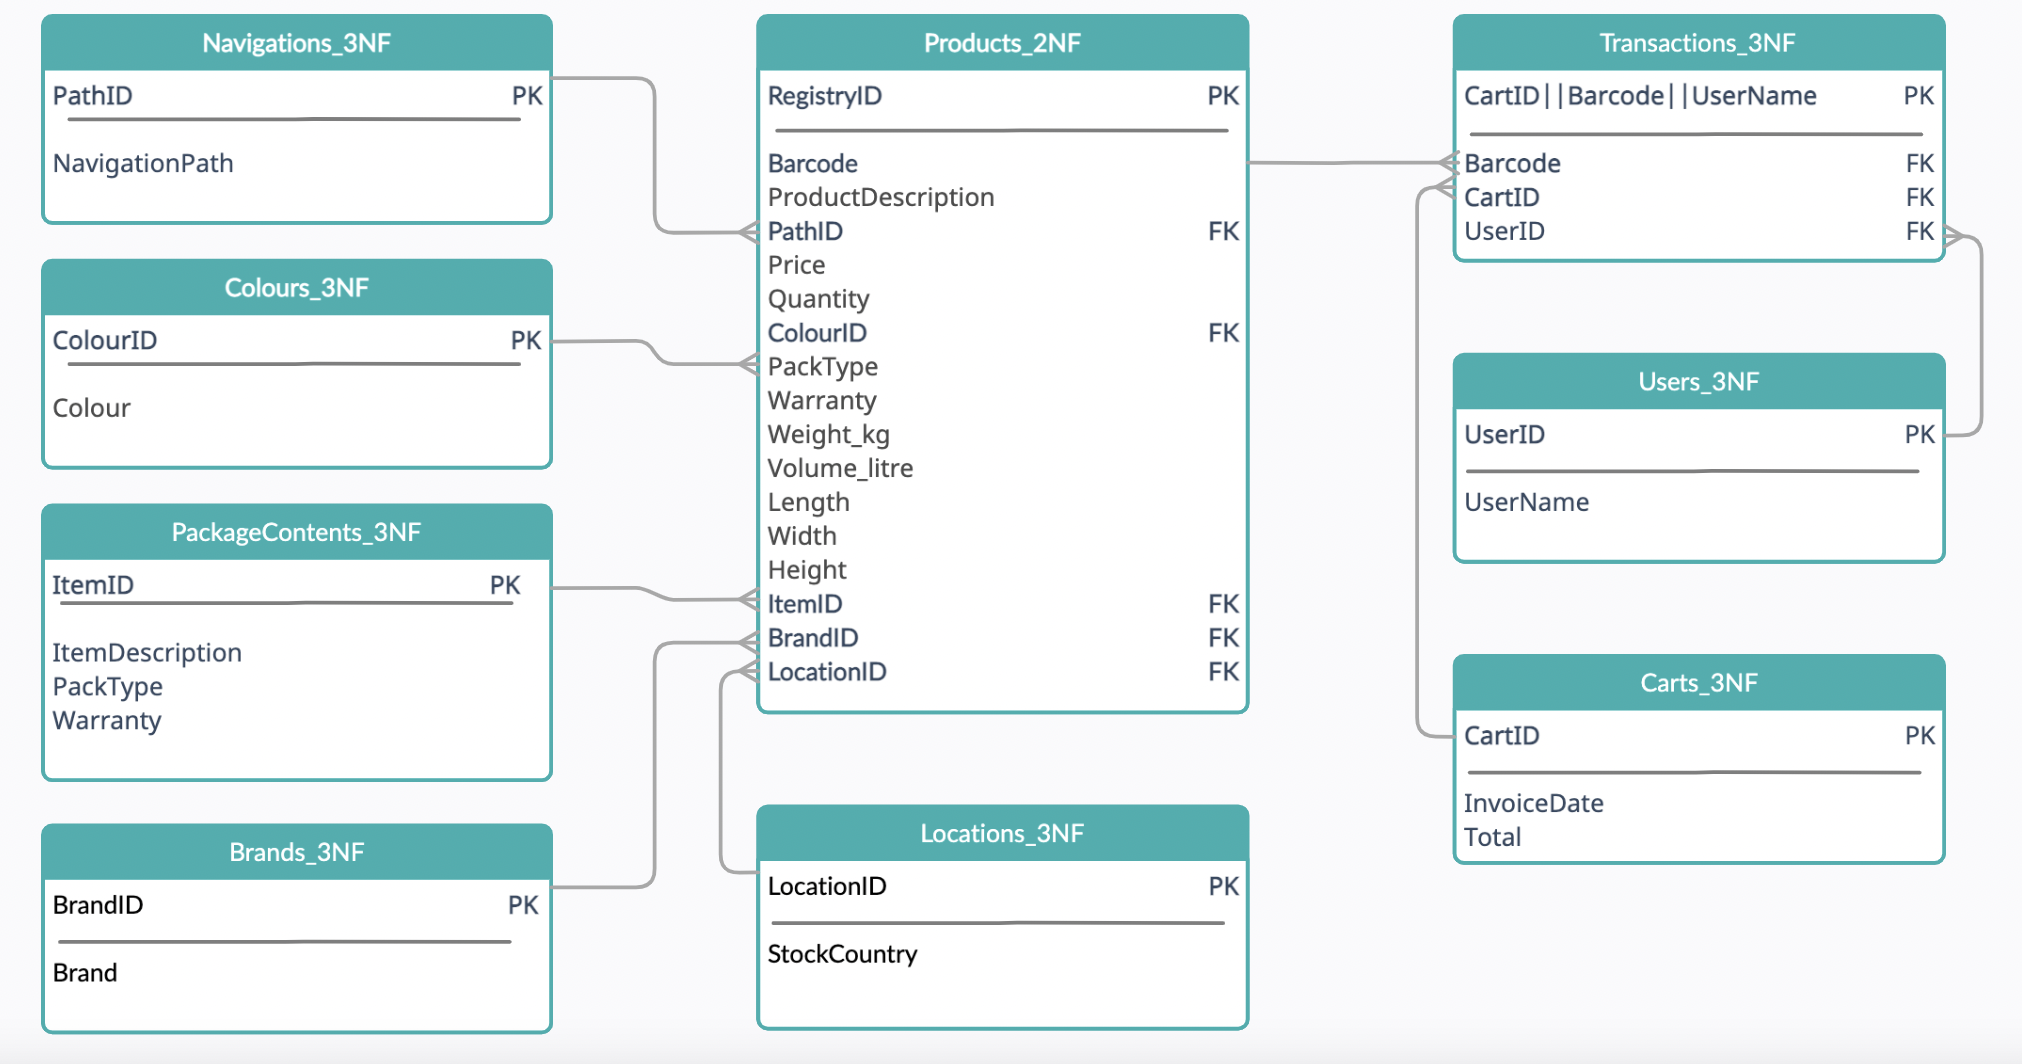

In [ ]:
%%read_sql

--#Create tables required for 2NF
DROP TABLE IF EXISTS "Transactions_3NF";
DROP TABLE IF EXISTS "Carts_3NF";
DROP TABLE IF EXISTS "Products_3NF";
DROP TABLE IF EXISTS "Users_3NF";
DROP TABLE IF EXISTS "Navigation_3NF";
DROP TABLE IF EXISTS "PackageContents_3NF";
DROP TABLE IF EXISTS "Colours_3NF";
DROP TABLE IF EXISTS "Brands_3NF";
DROP TABLE IF EXISTS "Locations_3NF";

CREATE TABLE "Products_3NF" (
    "RegistryID" INTEGER NOT NULL,
    "Barcode" VARCHAR(150) NOT NULL,
    "ProductDescription" VARCHAR(150) NOT NULL,
    "Price" REAL NOT NULL,
    "Quantity" INTEGER NOT NULL,
    "Weight_kg" REAL,
    "Volume_litre" REAL,
    "Length" REAL,
    "Width" REAL,
    "Height" REAL,
    "PathID" INTEGER,
    "ItemID" INTEGER,
    "ColourID" INTEGER,
    "BrandID" INTEGER,
    "LocationID" INTEGER,
    PRIMARY KEY("RegistryID" AUTOINCREMENT),
    FOREIGN KEY("PathID") REFERENCES "Navigation_3NF" ("PathID"),
    FOREIGN KEY("ItemID") REFERENCES "PackageContents_3NF" ("ItemID"),
    FOREIGN KEY("ColourID") REFERENCES "Colours_3NF" ("ColourID") ,
    FOREIGN KEY ("BrandID") REFERENCES "Brands_3NF" ("BrandID"),
    FOREIGN KEY ("LocationID") REFERENCES "Locations_3NF" ("LocationID")
);


CREATE TABLE "Carts_3NF" (
    "CartID" INTEGER NOT NULL,
    "InvoiceDate" DATETIME NOT NULL,
    "Total" REAL NOT NULL,
    PRIMARY KEY ("CartID")
);


CREATE TABLE "Users_3NF"(
    "UserID" INTEGER NOT NULL,
    UserName VARCHAR(50) NOT NULL,
    PRIMARY KEY("UserID" AUTOINCREMENT)
);


Query started at 01:33:56 AM SAST; Query executed in 0.00 m

### <font color='turquoise'>Action: proceed with the construction of the remaining tables mentioned </font>

In [ ]:
CREATE TABLE "Transactions_3NF" (
...
    
CREATE TABLE "Navigation_3NF"(
...

CREATE TABLE "PackageContents_3NF"(
...

CREATE TABLE "Colours_3NF"(
...

CREATE TABLE "Brands_3NF"(
...
    
CREATE TABLE "Locations_3NF"(
...


In [ ]:
%%read_sql

--# Populate the tables to that they conform to the 3rd Normal Form
DELETE FROM "Products_3NF";
DELETE FROM "Transactions_3NF";
DELETE FROM "Carts_3NF";
DELETE FROM "Users_3NF";
DELETE FROM "Navigation_3NF";
DELETE FROM "PackageContents_3NF";
DELETE FROM "Colours_3NF";
DELETE FROM "Brands_3NF";
DELETE FROM "Locations_3NF";

INSERT INTO "Users_3NF" ("UserName")
SELECT DISTINCT UserName FROM Transactions_2NF;


Query started at 01:33:57 AM SAST; Query executed in 0.00 m

### <font color='turquoise'>Action: proceed with the insertion into `Carts_3NF`.   </font>

Take note that there are duplicate values coming from `Transactions_2NF` - retain the `distinct` combinations of `CartID`,`InvoiceDate`,`Total` only.

In [ ]:
%%read_sql

INSERT INTO "Carts_3NF"("CartID","InvoiceDate","Total")
...


Query started at 01:33:58 AM SAST; Query executed in 0.00 m

### <font color='turquoise'>Action: proceed with the insertion into the tables below. </font>

Similarly to the table above, mind the occurances of duplicate entries. These can be avoided by using `SELECT distinct` to avoid inserting redundant rows. 


In [ ]:
%%read_sql

INSERT INTO "Locations_3NF" ("StockCountry")
...

INSERT INTO "Brands_3NF" ("Brand")
...

INSERT INTO "Colours_3NF" ("Colour")
...

INSERT INTO "PackageContents_3NF" ("ItemDescription","PackType","Warranty")
...

INSERT INTO "Navigation_3NF" ("NavigationPath")
...



### <font color='turquoise'>Action: proceed with the insertion into `Products_3NF`. </font>
Take note of the joins required for additional data contained in other tables. 

In [ ]:
%%read_sql

INSERT INTO "Products_3NF" ("PathID","ItemID","ColourID","BrandID","LocationID",
                            "Barcode","ProductDescription","Price",
                            "Quantity","Weight_kg","Volume_litre",
                            "Length","Width","Height")
SELECT
    PathID,
    ...


Query started at 01:33:58 AM SAST; Query executed in 0.00 m

### <font color='turquoise'>Action: proceed with the insertion into `Transactions_3NF`.   </font>

Follow previous proceedure, and checks. 

In [ ]:
%%read_sql

INSERT INTO "Transactions_3NF"("CartID||Barcode||UserName","CartID","Barcode","UserID")
... 


### <font color='turquoise'>Action: Investigate the DB.   </font>

Note - the tables counts below are what you should arrive at. If you don't, reconsider how you have done the inserts above. Having the tables correctly formatted will allow to answer the questions more easily, and without errors.

| Table Name | Count |
| --- | --- |
| Brands_3NF | 232 |
| Carts_3NF |  190 |
| Colours_3NF | 17 |
| Locations_3NF | 2 |
| Navigation_3NF | 396 |
| PackageContents_3NF | 600 |
| Products_3NF | 1214 |
| Transactions_3NF | 275 |
| Users_3NF | 158 |

In [ ]:
%%read_sql 

-- How many entries are here in each of the tables in the database now? 
select 'Products_3NF' as table_name, count(*) from Products_3NF
UNION
select 'Transactions_3NF' as table_name, count(*) from Transactions_3NF
UNION
select 'Users_3NF' as table_name, count(*) from Users_3NF
UNION
select 'Navigation_3NF' as table_name, count(*) from Navigation_3NF
UNION
select 'PackageContents_3NF' as table_name, count(*) from PackageContents_3NF
UNION
select 'Colours_3NF' as table_name, count(*) from Colours_3NF
UNION
select 'Brands_3NF' as table_name, count(*) from Brands_3NF
UNION
select 'Locations_3NF' as table_name, count(*) from Locations_3NF
UNION
select 'Carts_3NF' as table_name, count(*) from Carts_3NF


Query started at 02:18:50 AM SAST; Query executed in 0.00 m

,table_name,count(*)
0,3. Brands_3NF,232
1,3. Carts_3NF,190
2,3. Colours_3NF,17
3,3. Locations_3NF,2
4,3. Navigation_3NF,396
5,3. PackageContents_3NF,600
6,3. Products_3NF,1214
7,3. Transactions_3NF,275
8,3. Users_3NF,158


<a id='MCQ_questions'></a>
## 9. MCQ Questions

Having completed the normalisation of the database, you may use the following cells to help you answer the MCQs for the predict. 

Q1) How many unique products does the company have?

In [ ]:
%%read_sql
-- Write your query here:


Q2) How many users bought from Bhejane in April 2020?

In [ ]:
%%read_sql
-- Write your query here:


Q3) How many users bought 3 or more items that cost more than R1000?

In [ ]:
%%read_sql
-- Write your query here:


Q4) Which user made the largest purchase on a single transaction?

In [ ]:
%%read_sql
-- Write your query here:


Q5) How many components does the product: "5m Colour Changing RGB LED Strip Light" (MPTAL57588104) come with?

In [ ]:
%%read_sql
-- Write your query here:


Q6) How many brands are available at Bhejane?

In [ ]:
%%read_sql
-- Write your query here:


7) What is the price of the "Verimark - Floorwiz 2in1 Mop"?

In [ ]:
%%read_sql
-- Write your query here:


Q8) Calculate the package volume of the "Russell Hobbs - Slow Cooker" using the given dimensions

In [ ]:
%%read_sql
-- Write your query here:


Q9) Which user made the most transactions in the Year 2020?

In [ ]:
%%read_sql
-- Write your query here:


Q10) What is the total number of users that shop at Bhejane?

In [ ]:
%%read_sql
-- Write your query here:


Q11) What is the record count for the Colours_3NF Table?

In [ ]:
%%read_sql
-- Write your query here:


Q12) What would the total price be if I had the following items in my cart?
* MPTAL57588104
* 5000394203921
* 6932391917652

In [ ]:
%%read_sql
-- Write your query here:


Q13) What is the barcode of the most sold product?

In [ ]:
%%read_sql
-- Write your query here:


Q14) What are the products of Cornelis’ cart on the 2020-06-28 0:00:00?

In [ ]:
%%read_sql
-- Write your query here:


Q15) Which users bought locally produced, black-coloured products on odd-numbered months of the year, and what was the total cost (rounded to the nearest integer) of the carts containing these products?

In [ ]:
%%read_sql
-- Write your query here:
